# Milestone 1
## i. Introduction
Nama : Darmawan Wijaya </br>
Kelas : FTDS - 002 </br>
Obyektif : Mengaplikasikan konsep Artificial Neural Network untuk memprediksi retaining behaviour dari customer

## ii. Import Pustaka
Pustaka yang digunakan pada proyek ini adalah:</br>
1. Numpy
2. Pandas
3. Scikit Learn
4. Matplotlib
5. Seaborn

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



## iii. Data Loading
Data yang digunakan adalah data pelanggan perusahaan telekomunikasi yang mengindikasikan apakah pelanggan tersebut bertahan atau tidak. Data tersebut berisikan:
1. Gender
2. Senior
3. Jenis Layanan
4. Biaya Bulanan
5. Lama waktu berlangganan
6. Jenis kontrak
7. Jenis Pembayaran
8. Parameter lainnya

Data tersebut dapat diunduh pada : https://www.kaggle.com/blastchar/telco-customer-churn


In [4]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## iv. Data Cleaning
Data cleaning adalah proses penyiapan data sebelum dilakukan eksplorasi dan pengolahan data lebih lanjut. </br>
Proses data cleaning yang digunakan pada proyek ini adalah: </br>
1. Pengecekan Data Duplikat
2. Pengecekan Missing Values

In [5]:
duplicate = df[df.duplicated()]
duplicate

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df_cleaned = df.replace(r'^\s*$', np.nan, regex=True)


In [8]:
df_cleaned.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
#Menampilkan baris yang memiliki missing values
df_cleaned[df_cleaned.isnull().any(axis=1)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Ditemukan bahwa ternyata masih terdapat data missing values sebanyak 11 data pada fitur total charges. </br>
Hal ini kemungkinan dikarenakan bahwa untuk data tersebut memiliki tenure yang juga bernilai 0. </br>
Dikarenakan untuk feature total charges ini merupakan perkalian dari fitur monthly charges dengan tenure dan ditambah dengan variable lain, maka untuk metode imputasi dengan mean atau median kurang cocok digunakan </br>
Missing values ini juga hanya terdiri dari 11 data dari 7044 data, sehingga persentasenya sangat kecil. </br>
Atas dasar alasan-alasan diatas, kami memutuskan untuk menghapus baris yang memiliki missing values tersebut.

In [10]:
df_cleaned.dropna(inplace = True)
df_cleaned.reset_index(drop=True,inplace=True)
df_cleaned.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## v. Data Exploration

### Explore Churn Feature

In [11]:
print(df_cleaned.Churn.value_counts())
print(df_cleaned.Churn.value_counts()*100/len(df))


No     5163
Yes    1869
Name: Churn, dtype: int64
No     73.306829
Yes    26.536987
Name: Churn, dtype: float64


<AxesSubplot:ylabel='Churn'>

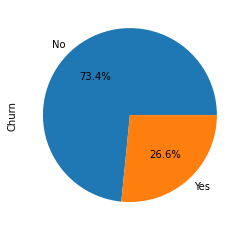

In [12]:
df_cleaned.Churn.value_counts().plot(kind = 'pie',autopct='%1.1f%%')

Dari total data, terdapat 26.6% pelanggan yang pergi/churn, sedangkan 73.4% sisanya tetap bertahan

### Explore Gender Feature

In [13]:
gender = df_cleaned.groupby(['gender','Churn']).size().reset_index(name='Count')
gender['percentage_gender'] = gender['Count'].div(gender.groupby('gender')['Count'].transform('sum')).mul(100)
gender

,gender,Churn,Count,percentage_gender
0,Female,No,2544,73.040482
1,Female,Yes,939,26.959518
2,Male,No,2619,73.795435
3,Male,Yes,930,26.204565


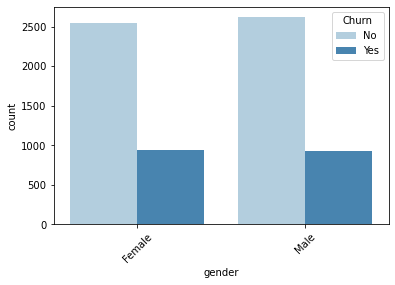

In [14]:
sns.countplot(data=df_cleaned, x="gender", hue="Churn" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari eksplorasi terhadap fitur gender, tidak terlihat adanya perbedaan antara customer yang pergi/churn terhadap gender mereka

### Explore SeniorCitizen Feature

In [15]:
senior = df_cleaned.groupby(['SeniorCitizen','Churn']).size().reset_index(name='Count')
senior['percentage_senior'] = senior['Count'].div(senior.groupby('SeniorCitizen')['Count'].transform('sum')).mul(100)
senior

,SeniorCitizen,Churn,Count,percentage_senior
0,0,No,4497,76.349745
1,0,Yes,1393,23.650255
2,1,No,666,58.318739
3,1,Yes,476,41.681261


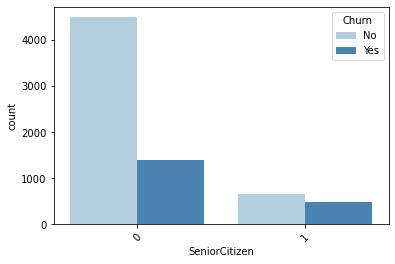

In [16]:
sns.countplot(data=df_cleaned, x="SeniorCitizen", hue="Churn" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari eksplorasi terhadap fitur Senior Citizen didapatkan insight: </br>
1. Sebagian besar customer bukan merupakan senior citizen
2. Customer yang tergolong senior citizen lebih cenderung untuk pergi/churn dibandingkan dengan customer yang bukan senior citizen

### Explore Partner Feature

In [17]:
partner = df_cleaned.groupby(['Partner','Churn']).size().reset_index(name='Count')
partner['percentage'] = partner['Count'].div(partner.groupby('Partner')['Count'].transform('sum')).mul(100)
partner

,Partner,Churn,Count,percentage
0,No,No,2439,67.023908
1,No,Yes,1200,32.976092
2,Yes,No,2724,80.282935
3,Yes,Yes,669,19.717065


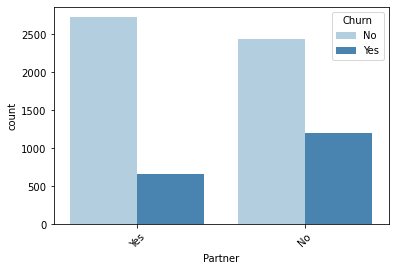

In [18]:
sns.countplot(data=df_cleaned, x="Partner", hue="Churn" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari eksplorasi terhadap fitur partner, didapatkan insight bahwa untuk customer yang bukan merupakan partner lebih cenderung untuk pergi/churn daripada customer partner 

### Explore Feature Dependents

In [19]:
depend = df_cleaned.groupby(['Dependents','Churn']).size().reset_index(name='Count')
depend['percentage'] = depend['Count'].div(depend.groupby('Dependents')['Count'].transform('sum')).mul(100)
depend

,Dependents,Churn,Count,percentage
0,No,No,3390,68.720860
1,No,Yes,1543,31.279140
2,Yes,No,1773,84.468795
3,Yes,Yes,326,15.531205


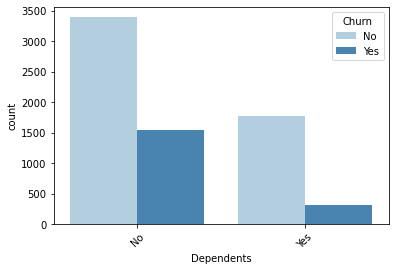

In [20]:
sns.countplot(data=df_cleaned, x="Dependents", hue="Churn" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari eksplorasi terhadap fitur dependents/tanggungan, didapatkan insight bahwa untuk customer yang tidak memiliki tanggungan lebih cenderung untuk pergi/churn daripada customer yang memiliki tanggungan

### Explore Tenure Feature

In [21]:
tenure = df_cleaned.groupby(['Churn']).agg({'tenure': [pd.Series.count, np.sum, np.mean]})
tenure

tenure                   
       count     sum       mean
Churn                          
No      5163  194387  37.650010
Yes     1869   33603  17.979133

<AxesSubplot:xlabel='Churn'>

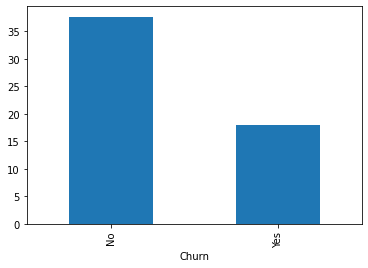

In [22]:
df_cleaned.groupby('Churn').tenure.mean().plot(kind='bar')


Dari ekplorasi fitur tenure atau lama menjadi customer, didapatkan insight bahwa customer yang memilih untuk pergi rata-rata baru menjadi customer selama 18 bulan, sedangkan untuk customer yang bertahan rata-rata sudah menjadi customer selama 37 bulan.

### Explore Monthly Charges Feature

In [23]:
monthly = df_cleaned.groupby(['Churn']).agg({'MonthlyCharges': [pd.Series.count, np.sum, np.mean]})
monthly

MonthlyCharges                      
               count        sum       mean
Churn                                     
No            5163.0  316530.15  61.307408
Yes           1869.0  139130.85  74.441332

<AxesSubplot:xlabel='Churn'>

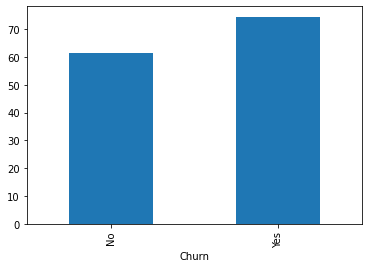

In [24]:
df_cleaned.groupby('Churn').MonthlyCharges.mean().plot(kind='bar')


Dari eksplorasi fitur monthly charges, didapatkan insight bahwa untuk rata-rata biaya bulanan dari customer yang pergi/churn sedikit lebih mahal daripada customer yang bertahan

### Explore Contract Feature

In [25]:
contract = df_cleaned.groupby(['Contract','Churn']).size().reset_index(name='Count')
contract['percentage'] = contract['Count'].div(contract.groupby('Contract')['Count'].transform('sum')).mul(100)
contract

,Contract,Churn,Count,percentage
0,Month-to-month,No,2220,57.290323
1,Month-to-month,Yes,1655,42.709677
2,One year,No,1306,88.722826
3,One year,Yes,166,11.277174
4,Two year,No,1637,97.151335
5,Two year,Yes,48,2.848665


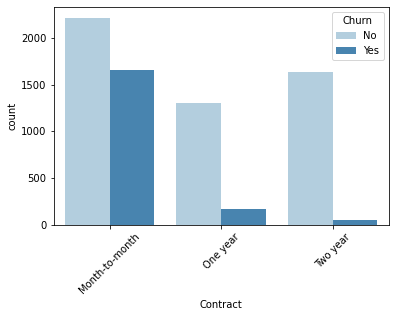

In [26]:
sns.countplot(data=df_cleaned, x="Contract", hue="Churn" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari eksplorasi dari fitur contract didapatkan insight bahwa:
1. Customer dengan jenis kontrak month-to-month lebih cenderung untuk pergi dibandingkan dengan jenis kontrak one-year maupun two-year

### Explore Payment Method

In [27]:
payment = df_cleaned.groupby(['PaymentMethod','Churn']).size().reset_index(name='Count')
payment['percentage'] = payment['Count'].div(payment.groupby('PaymentMethod')['Count'].transform('sum')).mul(100)
payment

,PaymentMethod,Churn,Count,percentage
0,Bank transfer (automatic),No,1284,83.268482
1,Bank transfer (automatic),Yes,258,16.731518
2,Credit card (automatic),No,1289,84.746877
3,Credit card (automatic),Yes,232,15.253123
4,Electronic check,No,1294,54.714588
5,Electronic check,Yes,1071,45.285412
6,Mailed check,No,1296,80.798005
7,Mailed check,Yes,308,19.201995


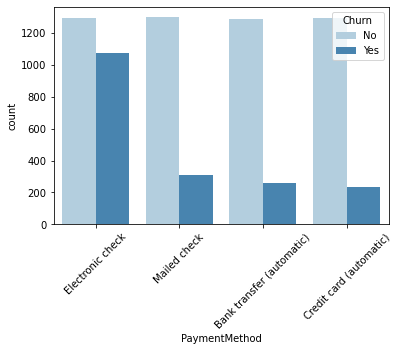

In [28]:
sns.countplot(data=df_cleaned, x="PaymentMethod", hue="Churn" , palette="Blues").tick_params(axis='x', labelrotation=45)
plt.show()


Dari eksplorasi dari fitur contract didapatkan insight bahwa:
1. Customer dengan jenis pembayaran electronic check lebih cenderung untuk pergi dibandingkan dengan jenis pembayaran lainnya

### Kesimpulan Eksplorasi Data

Dari eksplorasi data, didapatkan insight berupa:
1. Dari total data, terdapat 26.6% pelanggan yang pergi/churn, sedangkan 73.4% sisanya tetap bertahan.
2. Customer yang tergolong senior citizen lebih cenderung untuk pergi/churn.
3. Customer yang bukan merupakan partner lebih cenderung untuk pergi/churn
4. Customer yang tidak memiliki tanggungan lebih cenderung untuk pergi/churn.
5. Customer yang memilih untuk pergi rata-rata baru menjadi customer selama 18 bulan, sedangkan untuk customer yang bertahan rata-rata sudah menjadi customer selama 37 bulan.
6. Rata-rata biaya bulanan dari customer yang pergi/churn sedikit lebih mahal daripada customer yang bertahan
7. Customer dengan jenis kontrak month-to-month lebih cenderung untuk pergi
8. Customer dengan jenis pembayaran electronic check lebih cenderung untuk pergi

## vi. Data Preprocessing
Pada data preprocessing akan dilakukan:
1. Encoding kategorikal data
2. Feature Selection
3. Definisi X dan y
4. Train Test Split

In [29]:
df_cleaned.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [30]:
#Hapus fitur customer ID
df_cleaned.drop(columns='customerID',inplace=True)

#Ubah total charges menjadi numeric
df_cleaned['TotalCharges'] = pd.to_numeric(df_cleaned['TotalCharges'])

In [31]:
#Pengecekan kolom dengan nilai kategorikal untuk diencoding
kategori = [col for col in df_cleaned.columns if df_cleaned[col].dtypes == 'O']

kategori

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [32]:
#Hapur kolom churn dari daftar kolom yang akan diencoding
kategori.remove('Churn')
kategori

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [33]:
#Ubah feature Loan Status dari Y dan N menjadi 1 dan 0
df_cleaned.Churn= df_cleaned.Churn.map(dict(Yes=1, No=0))


In [34]:
# Definisi OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse = False)
# Aplikasi One Hot Encoder pada data
ohe.fit(df_cleaned[kategori])
cat_ohe = ohe.transform(df_cleaned[kategori])

#Pembuatan DataFrame dari fitur yang sudah diencode
ohe_df = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names(input_features = kategori))
#Penggabungan original data dengan dataframe encoded
df_encoded = pd.concat([df_cleaned, ohe_df], axis=1).drop(columns = kategori, axis=1)

In [35]:
df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,108.15,1,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,45,42.30,1840.75,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,0,72,103.20,7362.90,0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,0,11,29.60,346.45,0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,1,4,74.40,306.60,1,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Feature Selection

In [36]:
corr = df_encoded.corr()

In [37]:
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448


Kami memutuskan untuk menghapus fitur yang memiliki korelasi terhadap kolom churn dibawah 0.1, dan didapatkan 3 fitur yaitu:
1. Gender
2. Phone Services
3. Multiple Lines

Kami juga memutuskan untuk menghapus fitur Total Charges dikarenakan kami menganggap fitur tersebut sudah dapat dicover oleh Monthly Charges dan Tenure.

In [38]:
df_encoded.drop(columns=['PhoneService_No','PhoneService_Yes','gender_Female','gender_Male','MultipleLines_No','MultipleLines_Yes','MultipleLines_No phone service','TotalCharges'], inplace=True)

In [39]:
#Proses definisi X dan Y
y = df_encoded['Churn'].values
X = df_encoded.drop(columns=['Churn'],axis=1).values

In [40]:
#Train/Test Split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


## vii. Definisi Model

In [41]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

In [43]:
#Definisi Model Sequential
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(30, activation="relu",input_shape=X_train.shape[1:]))
	model.add(Dropout(0.2))
	model.add(Dense(100, activation="relu"))
	model.add(Dropout(0.2))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [44]:
#Definisi Model Functional
def functional():
    input_ = keras.layers.Input(shape=X_train.shape[1:])
    hidden1 = keras.layers.Dense(30, activation="relu")(input_)
    hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
    concat = keras.layers.concatenate([input_, hidden2])
    output = keras.layers.Dense(1)(concat)
    modelfunc = keras.models.Model(inputs=[input_], outputs=[output])
    # Compile model
    modelfunc.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return modelfunc

In [45]:
#Definisi Pipeline 
pipe_tfsq = Pipeline([('scl', StandardScaler()), ('clf', KerasClassifier(build_fn=create_model,verbose=0))])
pipe_func = Pipeline([('scl', StandardScaler()), ('clf', KerasClassifier(build_fn=functional,verbose=0))])


In [46]:
#Definisi Parameter yang akan dilakukan tuning yaitu batch size dan epoch
grid_params_sq = [{'clf__batch_size': [10, 20, 40, 60, 80, 100],
		'clf__epochs': [10, 50, 100]}] 
grid_params_func = [{'clf__batch_size': [10, 20, 40, 60, 80, 100],
		'clf__epochs': [10, 50, 100]}] 

In [47]:
#Definisi GridSearchCV
grid_sq = GridSearchCV(estimator=pipe_tfsq, param_grid=grid_params_sq, cv=3)
grid_func = GridSearchCV(estimator=pipe_func, param_grid=grid_params_func, cv=3)
grids = [grid_sq,grid_func]
grid_dict = {0: 'Sequential API', 1: 'Functional API'}


## viii. Model Training

In [48]:
#Model training with hyperparameter tuning using gridsearchcv
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred_valid = gs.predict(X_valid)
	# Test data accuracy of model with best params
	print('Test set accuracy for best params: %.3f ' % accuracy_score(y_valid, y_pred_valid))
	# Track best (highest test accuracy) model
	if accuracy_score(y_valid, y_pred_valid) > best_acc:
		best_acc = accuracy_score(y_valid, y_pred_valid)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Sequential API
Best params: {'clf__batch_size': 100, 'clf__epochs': 10}
Best training accuracy: 0.799
Test set accuracy for best params: 0.801 

Estimator: Functional API
Best params: {'clf__batch_size': 60, 'clf__epochs': 50}
Best training accuracy: 0.789
Test set accuracy for best params: 0.786 

Classifier with best test set accuracy: Sequential API


Dari hasil training dan gridsearch cv didapatkan bahwa untuk model Neural Network dengan Sequential API sedikit lebih unggul dalam menentukan apakah customer akan bertahan atau tidak. </br>
Untuk parameter dari batch size yang paling optimal adalah 60 dan parameter epoch yang paling optimal adalah 10. 

In [49]:
#Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [50]:
# create model
model2 = Sequential()
model2.add(Dense(30, activation="relu",input_shape=X_train.shape[1:]))
model2.add(Dropout(0.2))
model2.add(Dense(100, activation="relu"))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))
# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
model2.summary()

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_330 (Dense)            (None, 30)                1140      
_________________________________________________________________
dropout_110 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_331 (Dense)            (None, 100)               3100      
_________________________________________________________________
dropout_111 (Dropout)        (None, 100)               0         
_________________________________________________________________
dense_332 (Dense)            (None, 1)                 101       
Total params: 4,341
Trainable params: 4,341
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model2.fit(X_train,y_train, epochs=10,batch_size=60,validation_data=(X_valid,y_valid))

Epoch 1/10
71/71 [==============================] - 1s 4ms/step - loss: 0.5095 - accuracy: 0.7361 - val_loss: 0.4401 - val_accuracy: 0.7882
Epoch 2/10
71/71 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7793 - val_loss: 0.4301 - val_accuracy: 0.7946
Epoch 3/10
71/71 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.7862 - val_loss: 0.4252 - val_accuracy: 0.7960
Epoch 4/10
71/71 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7954 - val_loss: 0.4258 - val_accuracy: 0.7910
Epoch 5/10
71/71 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7937 - val_loss: 0.4224 - val_accuracy: 0.7932
Epoch 6/10
71/71 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.7982 - val_loss: 0.4216 - val_accuracy: 0.7960
Epoch 7/10
71/71 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.7968 - val_loss: 0.4222 - val_accuracy: 0.7953
Epoch 8/10
71/71 [==

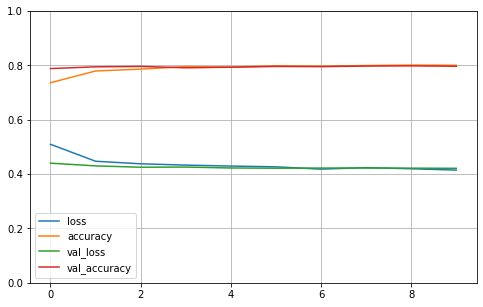

In [53]:
#Plot Hasil Training
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## ix. Model Evaluation

In [54]:
y_pred = model2.predict(X_test).round(0)

In [55]:
#Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[903 130]
 [174 200]]


In [56]:
#Interpreting confusion matrix
tp = cm[1,1]
tn = cm[0,0]
fp = cm[0,1]
fn = cm[1,0]

print('True Positives(TP) = ', tp)
print('True Negatives(TN) = ', tn)
print('False Positives(FP) = ', fp)
print('False Negatives(FN) = ', fn)

True Positives(TP) =  200
True Negatives(TN) =  903
False Positives(FP) =  130
False Negatives(FN) =  174


In [57]:
# Calculating evaluation metrics
accu = (tp+tn)/(tp+tn+fp+fn)
misclass = (fn+fp)/(tp+tn+fp+fn)
precis = tp/(tp+fp)
sensi = tp/(tp+fn)
speci = tn/(tn+fp)
f1 = 2 * (precis*sensi) / (precis+sensi)


print('Accuracy is ',accu)
print('Misclassification is ',misclass)
print('Precision is ',precis)
print('Sensitivity is ',sensi)
print('Specificity is',speci)
print('F-1 Score is ',f1)

Accuracy is  0.7839374555792467
Misclassification is  0.21606254442075337
Precision is  0.6060606060606061
Sensitivity is  0.5347593582887701
Specificity is 0.8741529525653436
F-1 Score is  0.5681818181818182


Dari hasil evaluasi, didapatkan hasil: </br>
1. Nilai Akurasi sebesar 78% yang berarti dari total data yang ada, model ini memprediksi 78% data yang benar positif maupun benar negatif
2. Nilai Misclassification 22% yang berarti dari total data yang ada, model ini memprediksi 22% data yang salah positif maupun salah negatif
3. Nilai Precision sebesar 60% yang berarti dari total data yang diprediksi positif, terdapat 60% data yang benar positif
4. Nilai Sensitivity / Recall sebesar 53% yang berarti dari total data yang sebenarnya positif, model ini memprediksi 53% data yang benar positif
5. Nilai Specificity sebesar 88% yang berarti dari total data yang sebenarnya negatif, model ini memprediksi 88% data yang benar negatif
6. Nilai F1 Score sebesar 56% yang berarti rata-rata nilai precision dan recall adalah sebesar 56%


## x. Model Saving

In [58]:
import joblib

In [59]:
model2.save('model2.h5')


In [60]:
#Proses Saving dari encoder one hot encoding
joblib.dump(ohe, 'encoder.joblib')


['encoder.joblib']

## xi. Model Inference

In [61]:
#Proses Pembuatan Data Sample dari data yang sudah diencoding
sampledf= df_encoded.sample(n=500).reset_index()
sampledf

,index,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2476,1,61,25.00,0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,6773,0,19,24.70,0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,6116,0,13,102.25,1,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3047,0,37,55.05,0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4092,0,6,29.45,0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,31,1,2,95.50,0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
496,1760,0,58,110.65,0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
497,3017,0,2,19.95,0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
498,1115,0,70,59.50,0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [62]:
sampledf.drop(columns='index',inplace=True)

In [63]:
#Proses definisi X dan Y sample
y_sample = sampledf['Churn'].values
X_sample = sampledf.drop(columns=['Churn'],axis=1).values

In [64]:
X_sample=scaler.fit_transform(X_sample)

In [65]:
#Proses prediksi data sample menggunakan model yang dipilih
y_pred_sample = model2.predict(X_sample).round(0)

In [66]:
#Pembuatan confusion matrix
cmsample = confusion_matrix(y_sample, y_pred_sample)
print('Confusion matrix\n\n', cmsample)

#Perhitungan kategori dalam confusion matrix
tpsample = cmsample[1,1]
tnsample = cmsample[0,0]
fpsample = cmsample[0,1]
fnsample = cmsample[1,0]

print('True Positives(TP) = ', tpsample)
print('True Negatives(TN) = ', tnsample)
print('False Positives(FP) = ', fpsample)
print('False Negatives(FN) = ', fnsample)

# Perhitungan evaluation metrics
accusample = (tpsample+tnsample)/(tpsample+tnsample+fpsample+fnsample)
misclasssample = (fnsample+fpsample)/(tpsample+tnsample+fpsample+fnsample)
precissample = tpsample/(tpsample+fpsample)
sensisample = tpsample/(tpsample+fnsample)
specisample = tnsample/(tnsample+fpsample)
f1sample = 2 * (precissample*sensisample) / (precissample+sensisample)


print('Accuracy of Random Forest Tuned is ',accusample)
print('Misclassification of Random Forest Tuned is ',misclasssample)
print('Precision of Random Forest Tuned is ',precissample)
print('Sensitivity of Random Forest Tuned is ',sensisample)
print('Specificity of Random Forest Tuned is ',specisample)
print('F-1 Score of Random Forest Tuned is ',f1sample)


Confusion matrix

 [[321  47]
 [ 58  74]]
True Positives(TP) =  74
True Negatives(TN) =  321
False Positives(FP) =  47
False Negatives(FN) =  58
Accuracy of Random Forest Tuned is  0.79
Misclassification of Random Forest Tuned is  0.21
Precision of Random Forest Tuned is  0.6115702479338843
Sensitivity of Random Forest Tuned is  0.5606060606060606
Specificity of Random Forest Tuned is  0.8722826086956522
F-1 Score of Random Forest Tuned is  0.5849802371541502


## xii. Kesimpulan

1. Tujuan dari permodelan ini adalah untuk mengaplikasikan konsep Artificial Neural Network untuk memprediksi retaining behaviour dari customer
2. Data yang digunakan adalah data pelanggan perusahaan telekomunikasi.
3. Ditemukan bahwa ternyata masih terdapat data missing values sebanyak 11 data pada fitur total charges yang kemudian akan dihapus.
4. Dari eksplorasi data, didapatkan insight berupa:
    1. Dari total data, terdapat 26.6% pelanggan yang pergi/churn, sedangkan 73.4% sisanya tetap bertahan.
    2. Customer yang tergolong senior citizen lebih cenderung untuk pergi/churn.
    3. Customer yang bukan merupakan partner lebih cenderung untuk pergi/churn
    4. Customer yang tidak memiliki tanggungan lebih cenderung untuk pergi/churn.
    5. Customer yang memilih untuk pergi rata-rata baru menjadi customer selama 18 bulan, sedangkan untuk customer yang bertahan rata-rata sudah menjadi customer selama 37 bulan.
    6. Rata-rata biaya bulanan dari customer yang pergi/churn sedikit lebih mahal daripada customer yang bertahan
    7. Customer dengan jenis kontrak month-to-month lebih cenderung untuk pergi
    8. Customer dengan jenis pembayaran electronic check lebih cenderung untuk pergi
5. Kami memutuskan untuk menghapus beberapa fitur yaitu:
    1. Gender, Phone Services, Multiple Lines dikarenakan memiliki korelasi rendah terhadap total charges
    2. Kami juga memutuskan untuk menghapus fitur Total Charges dikarenakan kami menganggap fitur tersebut sudah dapat dicover oleh Monthly Charges dan Tenure.
6. Kami melakukan gridsearchcv terhadap model sequential dan functional dan didapatkan model sequential sedikit lebih unggul dengan parameter epoch 10 dan batch size 60.
7. Dari hasil evaluasi, didapatkan hasil: </br>
    1. Nilai Akurasi sebesar 78% yang berarti dari total data yang ada, model ini memprediksi 78% data yang benar positif maupun benar negatif
    2. Nilai Misclassification 22% yang berarti dari total data yang ada, model ini memprediksi 22% data yang salah positif maupun salah negatif
    3. Nilai Precision sebesar 60% yang berarti dari total data yang diprediksi positif, terdapat 60% data yang benar positif
    4. Nilai Sensitivity / Recall sebesar 53% yang berarti dari total data yang sebenarnya positif, model ini memprediksi 53% data yang benar positif
    5. Nilai Specificity sebesar 88% yang berarti dari total data yang sebenarnya negatif, model ini memprediksi 88% data yang benar negatif
    6. Nilai F1 Score sebesar 56% yang berarti rata-rata nilai precision dan recall adalah sebesar 56%
8. Kami melakukan model inference dengan sampling data dari data yang sudah diencoding